<a href="https://colab.research.google.com/gist/aravraj147/7ea12a32972a7bfe55e88486f2fad6c4/prodj-phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filename='newdataset1.csv'
data=pd.read_csv(filename)

In [ ]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500.0,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500.0,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...",79.853364,6.906814,"Seafood, Italian",4500.0,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196.0
9292,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000.0,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286.0
9293,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01",79.844239,6.932814,Seafood,4000.0,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203.0
9294,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...",79.902941,6.906815,"Continental, American",2000.0,Sri Lankan Rupee(LKR),No,No,No,No,3,4.1,Green,Very Good,58.0


# **LEVEL 2: Task 1- Table Booking and Online Delivery**

In [ ]:
v1=data['Has Online delivery'].value_counts()
v1.to_dict()

{'No': 6881, 'Yes': 2415}

In [ ]:
v2=data['Has Table booking'].value_counts()
v2.to_dict()

{'No': 8168, 'Yes': 1128}

In [ ]:
lst=list(v1[v1.keys()])
lst1=list(v2[v2.keys()])
print(lst,lst1)

[6881, 2415] [8168, 1128]


In [ ]:
val=v1.index.to_list()
print(val)

['No', 'Yes']


**Percentage of Restaurants Offering Table Booking and Online Delivery**

In [ ]:

total_count=9296
def calculate(l1,l2):
  for i,j,k in zip(l1,l2,val):
    p1=(i/total_count)*100
    p2=(j/total_count)*100
    p3="{:.2%}".format(p1)
    p4="{:.2%}".format(p2)
    print(f'\'{k}\'Percentage of Restaurant Has Table booking:\n\t{p4}\n')
    print(f'\'{k}\'Percentage of Restaurant Has Online Delivery:\n\t{p3}\n')
calculate(lst,lst1)

'No'Percentage of Restaurant Has Table booking:
	8786.57%

'No'Percentage of Restaurant Has Online Delivery:
	7402.11%

'Yes'Percentage of Restaurant Has Table booking:
	1213.43%

'Yes'Percentage of Restaurant Has Online Delivery:
	2597.89%



**Average Ratings of Restaurants
With Table Booking and without**

In [ ]:
cal1=data.groupby('Has Table booking')['Aggregate rating']
dd=cal1.mean().round(2)
d2=pd.DataFrame(dd)
d2.rename(columns={'Aggregate rating':'Average Ratings'},inplace=True )
d2

,Average Ratings
Has Table booking,
No,3.39
Yes,3.57


**Number of Restaraunts Having Online Delivery For Each Price Range**

In [ ]:

g3=data.groupby(['Price range'])[['Restaurant Name','Has Online delivery']]
g4=pd.DataFrame(g3.value_counts())
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)
g4

0
Price range Restaurant Name                              Has Online delivery    
1           Cafe Coffee Day                              No                   78
            Green Chick Chop                             No                   47
            Keventers                                    No                   32
            Twenty Four Seven                            No                   19
            Republic of Chicken                          No                   18
...                                                                           ..
4           Insomnia - Taj Vivanta                       No                    1
            Infinity - Crowne Plaza                      No                    1
            Indian Accent - The Manor                    No                    1
            India on my Plate - Fortune Select Excalibur No                    1
            wagamama                                     No                    1

[7554 rows x 1 columns]

In [ ]:
g1=data.groupby(['Has Online delivery'])['Price range']
g2=pd.DataFrame(g1.value_counts(sort=True))
g2.columns=['Number of Restaurants']
g2

Number of Restaurants
Has Online delivery Price range                       
No                  1                             3723
                    2                             1758
                    3                              922
                    4                              478
Yes                 2                             1258
                    1                              697
                    3                              407
                    4                               53

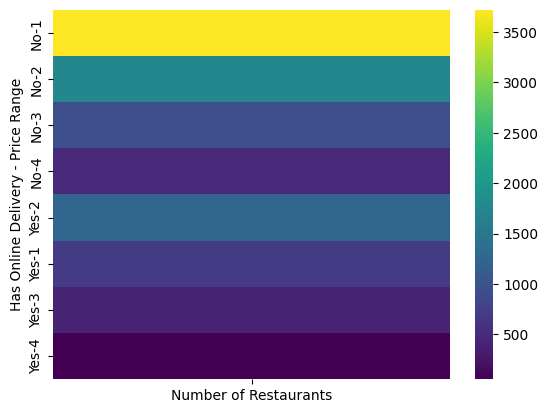

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(g2,cmap="viridis")
plt.ylabel('Has Online Delivery - Price Range')
plt.show()

## **Task 2- PRICE RANGE ANALYSIS**

In [ ]:
vv=data['Price range']
vv.value_counts()

1    4420
2    3016
3    1329
4     531
Name: Price range, dtype: int64

In [ ]:
print('Common Price range Among All Restaurants:\n')
vv.mean()

Common Price range Among All Restaurants:



1.7817340791738383

In [ ]:
m1=data.groupby('Price range')['Aggregate rating'].mean()
print('Average Ratings for each Price Range:\n')
m1

Average Ratings for each Price Range:



Price range
1    3.299434
2    3.366844
3    3.746050
4    3.847081
Name: Aggregate rating, dtype: float64



> Note:


*The resultant Average Ratings is due to the fillna method used in Level 1
 [Cellno:13]  wherein the NA values were replaced by mean of all the values in the Series('Aggregate rating').*


>-----






In [ ]:
m2=data.groupby('Price range')['Rating color']
m2=pd.DataFrame(m2.value_counts())
m2.columns

Index(['Rating color'], dtype='object')

In [ ]:
m2.rename(columns={'Rating color':'Count'},inplace=True)
m3=m2.reset_index()
print('Colors Representing the Highest average rating among different price ranges\n')
m3

Colors Representing the Highest average rating among different price ranges



,Price range,Rating color,Count
0,1,Orange,1889
1,1,White,1695
2,1,Yellow,599
3,1,Green,144
4,1,Red,62
5,1,Dark Green,31
6,2,Orange,1406
7,2,Yellow,765
8,2,White,394
9,2,Green,299


### **Task 3- Feature Enginnering**

In [ ]:
data['lenght of Restaurant Name']=data['Restaurant Name'].apply(len)

In [ ]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,lenght of Restaurant Name
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0,16
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0,16
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0,22
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500.0,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365.0,4
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500.0,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...",79.853364,6.906814,"Seafood, Italian",4500.0,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196.0,25
9292,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000.0,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286.0,10
9293,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01",79.844239,6.932814,Seafood,4000.0,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203.0,16
9294,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...",79.902941,6.906815,"Continental, American",2000.0,Sri Lankan Rupee(LKR),No,No,No,No,3,4.1,Green,Very Good,58.0,12


In [ ]:
new_data=pd.get_dummies(data,columns=['Has Table booking','Has Online delivery'],drop_first=True)
new_data.rename(columns={'Has Table booking_Yes':'Has Table Booking','Has Online delivery_Yes':'Has Online Delivery'},inplace=True)
new_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,lenght of Restaurant Name,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),No,No,3,4.8,Dark Green,Excellent,314.0,16,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),No,No,3,4.5,Dark Green,Excellent,591.0,16,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,Botswana Pula(P),No,No,4,4.4,Green,Very Good,270.0,22,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500.0,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,365.0,4,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500.0,Botswana Pula(P),No,No,4,4.8,Dark Green,Excellent,229.0,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...",79.853364,6.906814,"Seafood, Italian",4500.0,Sri Lankan Rupee(LKR),No,No,4,4.0,Green,Very Good,196.0,25,0,0
9292,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000.0,Sri Lankan Rupee(LKR),No,No,3,4.2,Green,Very Good,286.0,10,0,0
9293,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01",79.844239,6.932814,Seafood,4000.0,Sri Lankan Rupee(LKR),No,No,4,4.9,Dark Green,Excellent,203.0,16,0,0
9294,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...",79.902941,6.906815,"Continental, American",2000.0,Sri Lankan Rupee(LKR),No,No,3,4.1,Green,Very Good,58.0,12,0,0


*Checking Whether Feature Change Has affected Original values or not*


>



In [ ]:
new_data['Has Online Delivery'].value_counts()

0    6881
1    2415
Name: Has Online Delivery, dtype: int64



> Final Dataset(Exported)



In [ ]:
ogfile='finaldataset.csv'
new_data.to_csv(ogfile,index=False)